In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Replace with your actual file name
file_name = '/content/DATASETDATASCIENCE.csv'

try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded '{file_name}'. It has {df.shape[0]} rows.")
except FileNotFoundError:
    print(f"ERROR: The file '{file_name}' was not found. Please upload it and check the name.")

# See the first 5 rows
df.head()

Successfully loaded '/content/DATASETDATASCIENCE.csv'. It has 1405 rows.


,Country,State,District,Year,Class,"Number Of Schools Surveyed (UOM:Number), Scaling Factor:1","Number Of Students Surveyed (UOM:Number), Scaling Factor:1","Average Performance Of Students In L813 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In M601 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In M606 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1",...,"Average Performance Of Students In Sst807 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst809 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst810 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst815 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst816 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst818 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst823 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst827 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst831 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1","Average Performance Of Students In Sst833 Learning Outcome (UOM:%(Percentage)), Scaling Factor:1"
0,India,Andaman and Nicobar Islands,Nicobars,"Calendar Year (Jan - Dec), 2021",8,80.0,1412.0,37.58,39.72,33.55,...,15.46,24.81,10.79,16.42,11.64,33.94,57.59,48.56,35.05,29.05
1,India,Andaman and Nicobar Islands,North and Middle Andaman,"Calendar Year (Jan - Dec), 2021",8,132.0,2428.0,50.02,47.57,43.83,...,33.16,36.51,23.13,33.29,34.94,43.87,24.33,31.76,26.19,56.51
2,India,Andaman and Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2021",8,188.0,4588.0,57.06,53.56,45.73,...,35.39,36.60,17.93,29.83,30.16,35.41,28.70,26.91,30.60,62.92
3,India,Andhra Pradesh,Ananthapuramu,"Calendar Year (Jan - Dec), 2021",8,264.0,7000.0,47.09,45.60,44.65,...,34.64,29.59,24.51,26.15,25.23,36.17,39.94,28.80,32.78,59.06
4,India,Andhra Pradesh,East Godavari,"Calendar Year (Jan - Dec), 2021",8,216.0,5736.0,48.83,43.50,47.11,...,39.76,32.18,21.34,25.52,23.47,35.21,35.75,26.63,35.42,60.91


In [15]:
# --- 2.1: Clean Column Names ---
# This function makes column names shorter and easier to use in code
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = col.split('(')[0].strip().replace(' ', '_')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

df = clean_col_names(df)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)

# --- 2.2: Create Summary Scores for Subjects ---
# We calculate an average score for Math, Science, and Social Studies (SST)
math_cols = [col for col in df.columns if '_In_M' in col]
science_cols = [col for col in df.columns if '_In_Sci' in col]
sst_cols = [col for col in df.columns if '_In_Sst' in col]

df['Math_Performance'] = df[math_cols].mean(axis=1)
df['Science_Performance'] = df[science_cols].mean(axis=1)
df['SST_Performance'] = df[sst_cols].mean(axis=1)
df['Overall_Performance'] = df[['Math_Performance', 'Science_Performance', 'SST_Performance']].mean(axis=1)

# --- 2.3: Focus on the most recent year's data (2021) ---
df_2021 = df[df['Year'] == 2021].copy()

print("Data is now clean and summary scores have been created.")
# Display the new summary columns
df_2021[['State', 'District', 'Overall_Performance', 'Math_Performance', 'Science_Performance']].head()

Data is now clean and summary scores have been created.


,State,District,Overall_Performance,Math_Performance,Science_Performance
0,Andaman and Nicobar Islands,Nicobars,28.996854,31.4395,26.298333
1,Andaman and Nicobar Islands,North and Middle Andaman,36.163354,33.3290,39.883333
2,Andaman and Nicobar Islands,South Andamans,37.321576,34.3445,41.162500
3,Andhra Pradesh,Ananthapuramu,33.874722,35.7450,33.019167
4,Andhra Pradesh,East Godavari,34.892015,35.8615,34.795000


--- National Performance Summary (2021) ---
       Overall_Performance  Math_Performance  Science_Performance  \
count           706.000000        706.000000           706.000000   
mean             37.425093         35.926949            38.303162   
std               5.318112          6.422964             5.090959   
min              26.786535         24.211500            26.298333   
25%              33.848948         31.366250            34.759375   
50%              36.597359         35.014750            37.603333   
75%              39.739771         38.692250            41.190625   
max              66.518803         72.113000            60.727500   

       SST_Performance  
count       706.000000  
mean         38.045167  
std           5.040998  
min          27.198182  
25%          34.632614  
50%          37.393409  
75%          40.313523  
max          66.715909  


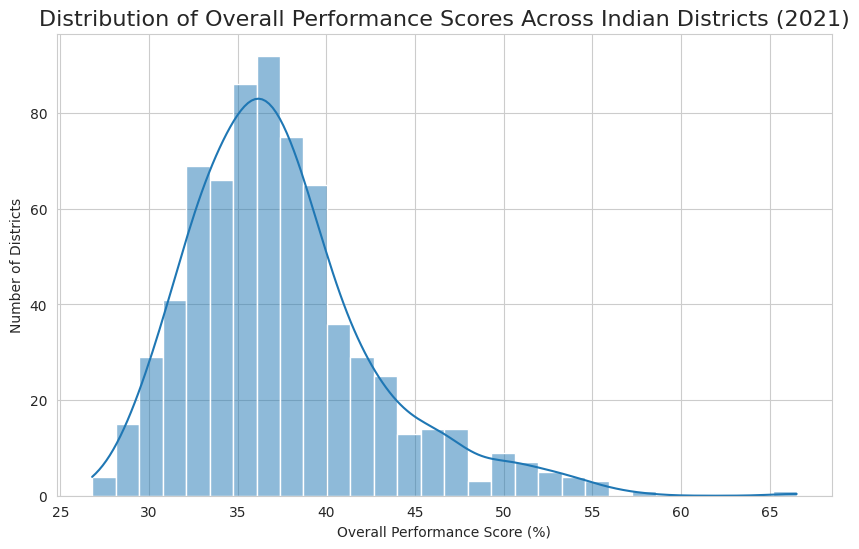

In [28]:
# --- 3.1: See the national summary statistics ---
print("--- National Performance Summary (2021) ---")
# This shows the average, min, max, etc., for our summary scores across all districts
print(df_2021[['Overall_Performance', 'Math_Performance', 'Science_Performance', 'SST_Performance']].describe())


# --- 3.2: Visualize the distribution of scores ---
plt.figure(figsize=(10, 6))
sns.histplot(df_2021['Overall_Performance'], kde=True, bins=30)
plt.title('Distribution of Overall Performance Scores Across Indian Districts (2021)', fontsize=16)
plt.xlabel('Overall Performance Score (%)')
plt.ylabel('Number of Districts')
plt.show()

--- State Rankings by Average Overall Performance (2021) ---
State
Punjab                                          48.984702
Chandigarh                                      47.653646
Rajasthan                                       46.337079
Haryana                                         42.867666
Madhya Pradesh                                  40.397288
Jammu and Kashmir                               39.727462
West Bengal                                     39.146810
Ladakh                                          39.001154
Gujarat                                         38.258212
Delhi                                           38.106105
Bihar                                           38.052472
Odisha                                          37.711416
Maharashtra                                     37.347620
Uttarakhand                                     37.326392
Manipur                                         37.325056
Assam                                           37.165769
Tripu

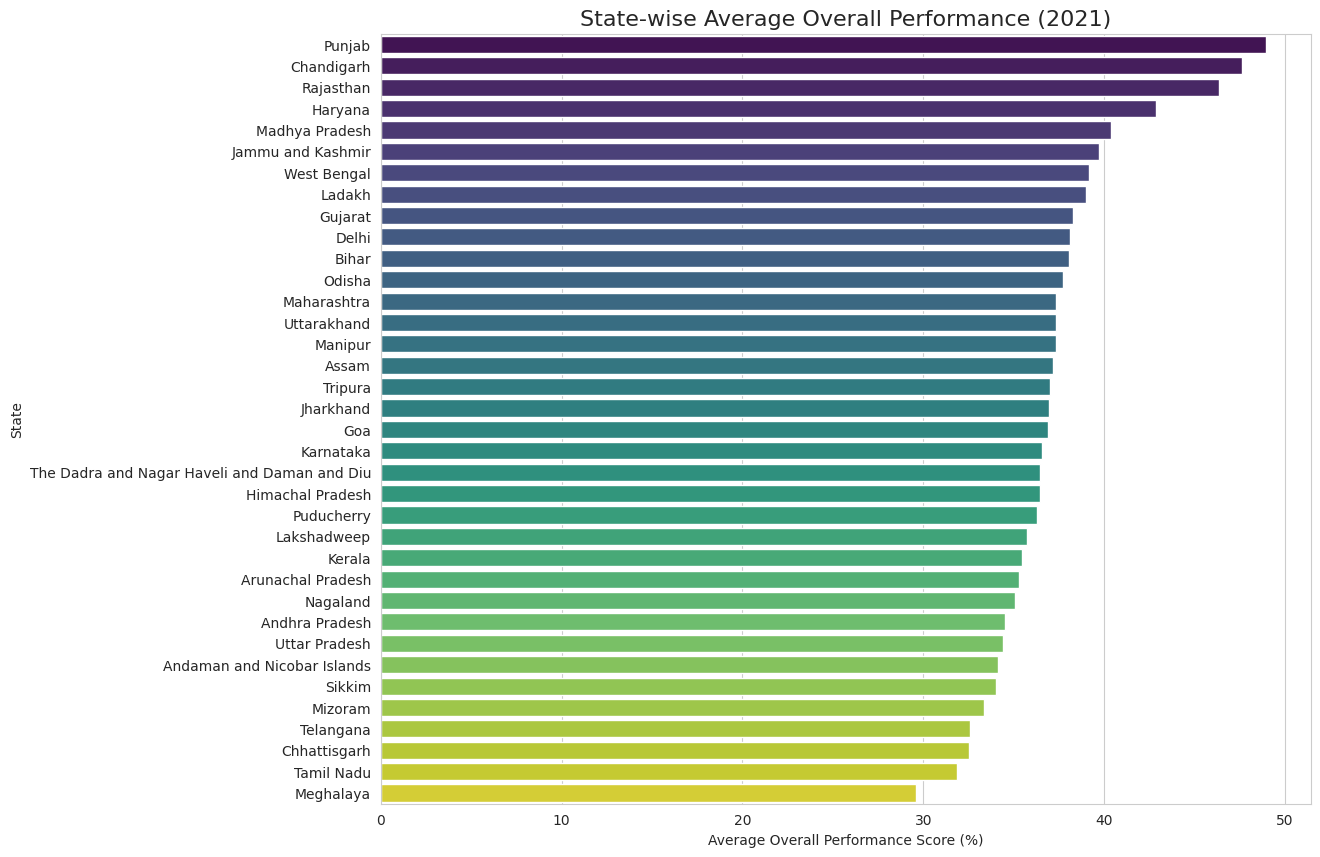

In [25]:
# --- 4.1: Calculate average performance for each state ---
state_performance = df_2021.groupby('State')['Overall_Performance'].mean().sort_values(ascending=False)

print("--- State Rankings by Average Overall Performance (2021) ---")
print(state_performance)

# --- 4.2: Create a bar chart to visualize state rankings ---
plt.figure(figsize=(12, 10))
sns.barplot(x=state_performance.values, y=state_performance.index, palette='viridis', hue=state_performance.index, legend=False)
plt.title('State-wise Average Overall Performance (2021)', fontsize=16)
plt.xlabel('Average Overall Performance Score (%)')
plt.ylabel('State')
plt.show()

--- Top 10 Most Difficult Topics Nationally (Lowest Average Score) ---
M705      22.385850
Sst610    26.116657
Sci711    26.259915
Sst810    27.169533
Sst816    27.474398
M706      28.044292
M620      28.323265
Sst805    28.661197
M710      29.167252
M819      29.681558
dtype: float64


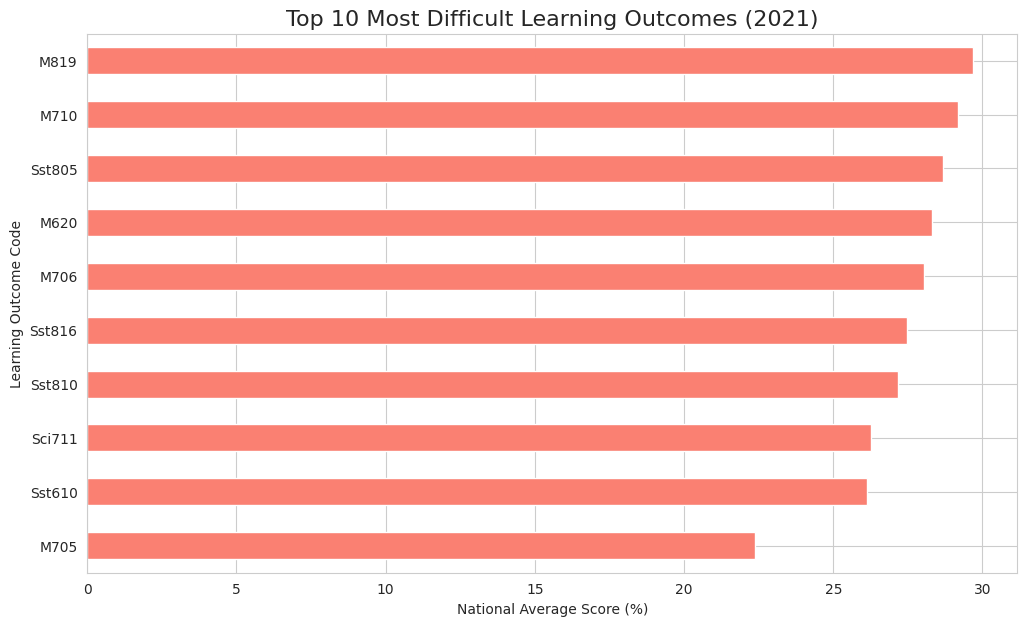

In [18]:
# --- 5.1: Find the average score for every single learning outcome ---
# We will use the original columns for this
learning_outcome_cols = [col for col in df.columns if col.startswith('Average_Performance')]
topic_performance = df_2021[learning_outcome_cols].mean().sort_values(ascending=True)

# --- 5.2: Identify and plot the 10 most difficult topics ---
hardest_topics = topic_performance.head(10)
# Clean up the names for the plot
hardest_topics.index = hardest_topics.index.str.replace('Average_Performance_Of_Students_In_', '').str.replace('_Learning_Outcome', '')

print("--- Top 10 Most Difficult Topics Nationally (Lowest Average Score) ---")
print(hardest_topics)

# --- 5.3: Create a bar chart for the hardest topics ---
plt.figure(figsize=(12, 7))
hardest_topics.plot(kind='barh', color='salmon')
plt.title('Top 10 Most Difficult Learning Outcomes (2021)', fontsize=16)
plt.xlabel('National Average Score (%)')
plt.ylabel('Learning Outcome Code')
plt.show()

--- Correlation Matrix Between Subjects ---
                     Math_Performance  Science_Performance  SST_Performance
Math_Performance             1.000000             0.852117         0.907612
Science_Performance          0.852117             1.000000         0.924590
SST_Performance              0.907612             0.924590         1.000000


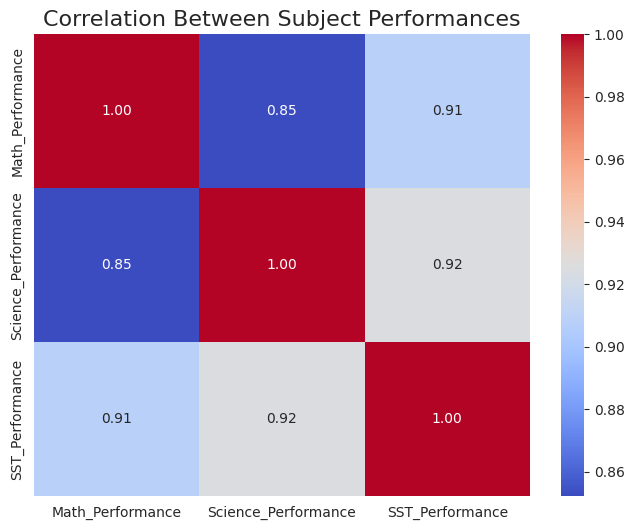

In [19]:
# --- 7.1: Select the performance columns ---
subject_corr_df = df_2021[['Math_Performance', 'Science_Performance', 'SST_Performance']]

# --- 7.2: Calculate the correlation matrix ---
correlation_matrix = subject_corr_df.corr()

print("--- Correlation Matrix Between Subjects ---")
print(correlation_matrix)

# --- 7.3: Visualize the matrix as a heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Subject Performances', fontsize=16)
plt.show()

Found 4 districts with performance > 55%
--- Sample of High-Performing 'Bright Spot' Districts ---
              State   District  Overall_Performance
507       Rajasthan    Dholpur            66.518803
312  Madhya Pradesh      Bhind            57.339914
515       Rajasthan  Jhunjhunu            55.475242
519       Rajasthan     Nagaur            55.397626

Found 26 districts with performance < 30%
--- Sample of Low-Performing 'Hotspot' Districts ---
         State               District  Overall_Performance
409  Meghalaya        East Garo Hills            26.786535
414  Meghalaya       South Garo Hills            26.952455
412  Meghalaya       North Garo Hills            27.078369
415  Meghalaya  South West Garo Hills            27.763747
465     Odisha               Rayagada            28.120449


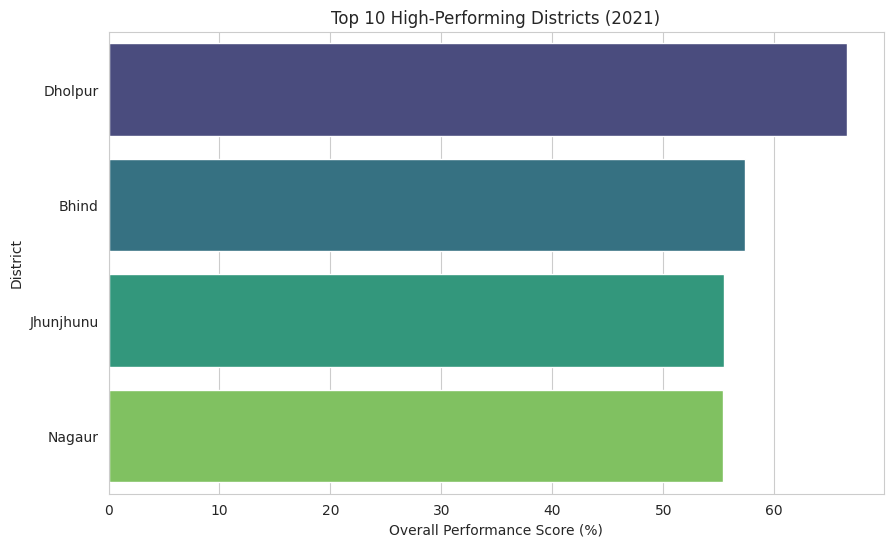

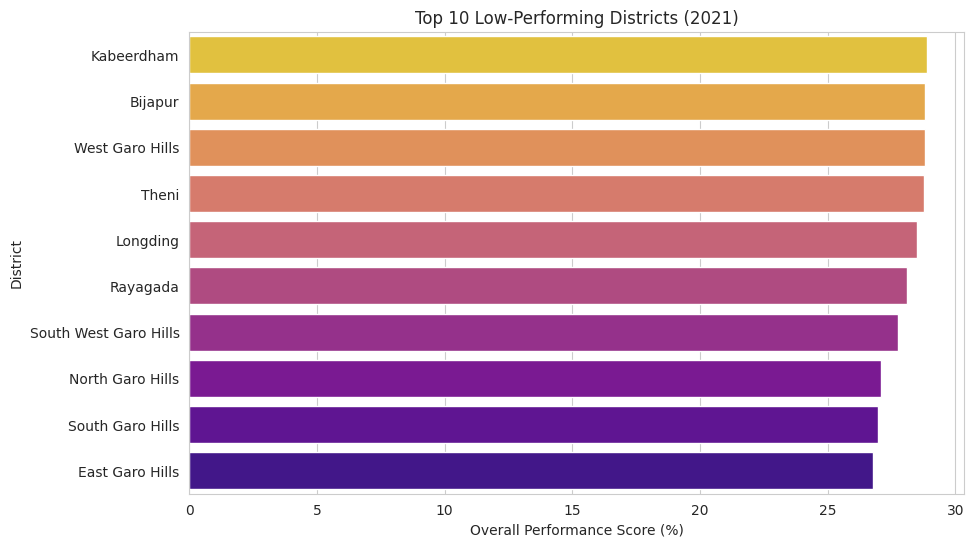

In [24]:
# --- 8.1: Set performance thresholds ---
high_threshold = 55
low_threshold = 30

# --- 8.2: Filter the dataframe to find these districts ---
high_performing_districts = df_2021[df_2021['Overall_Performance'] > high_threshold].sort_values(by='Overall_Performance', ascending=False)
low_performing_districts = df_2021[df_2021['Overall_Performance'] < low_threshold].sort_values(by='Overall_Performance', ascending=True)

print(f"Found {len(high_performing_districts)} districts with performance > {high_threshold}%")
print("--- Sample of High-Performing 'Bright Spot' Districts ---")
print(high_performing_districts[['State', 'District', 'Overall_Performance']].head())

print(f"\nFound {len(low_performing_districts)} districts with performance < {low_threshold}%")
print("--- Sample of Low-Performing 'Hotspot' Districts ---")
print(low_performing_districts[['State', 'District', 'Overall_Performance']].head())

# --- 8.3: Visualize high-performing districts ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall_Performance', y='District', data=high_performing_districts.head(10), palette='viridis', hue='District', legend=False)
plt.title('Top 10 High-Performing Districts (2021)')
plt.xlabel('Overall Performance Score (%)')
plt.ylabel('District')
plt.show()

# --- 8.4: Visualize low-performing districts ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall_Performance', y='District', data=low_performing_districts.head(10), palette='plasma', hue='District', legend=False)
plt.title('Top 10 Low-Performing Districts (2021)')
plt.xlabel('Overall Performance Score (%)')
plt.ylabel('District')
plt.gca().invert_yaxis() # Invert the y-axis to show lowest performance at the top
plt.show()

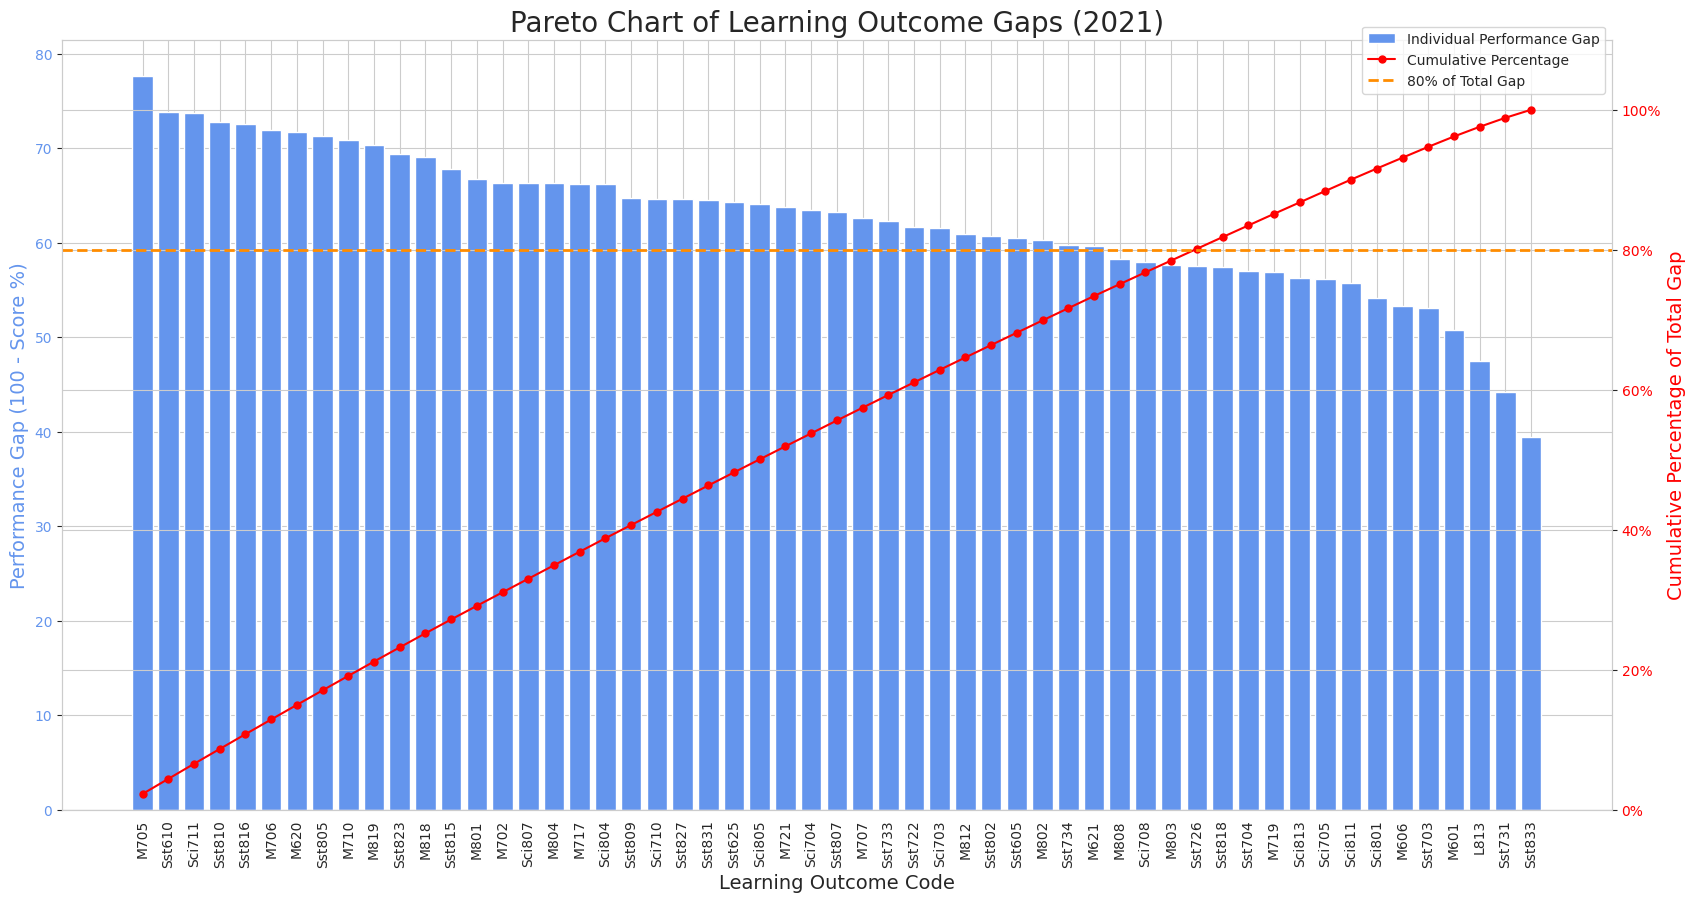

In [31]:
# Import the Pareto function from matplotlib
from matplotlib.ticker import PercentFormatter

# --- 10.3: Create the plot ---
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the bars (performance gap)
ax.bar(df_pareto.index, df_pareto['gap'], color='cornflowerblue', label='Individual Performance Gap')
ax.set_ylabel('Performance Gap (100 - Score %)', color='cornflowerblue', fontsize=14)
ax.tick_params(axis='y', labelcolor='cornflowerblue')
plt.xticks(rotation=90, fontsize=10)

# Create a second y-axis to plot the cumulative percentage line
ax2 = ax.twinx()
ax2.plot(df_pareto.index, df_pareto['cumulative_percentage'], color='red', marker='o', ms=5, label='Cumulative Percentage')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative Percentage of Total Gap', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110) # Set limit slightly above 100

# Add a line for the 80% mark
ax2.axhline(80, color='darkorange', linestyle='--', linewidth=2, label='80% of Total Gap')

# Final formatting
plt.title('Pareto Chart of Learning Outcome Gaps (2021)', fontsize=20)
ax.set_xlabel('Learning Outcome Code', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()